# Модель предсказания коэффициента содержания золота в породе

## Описание проекта

Компания разрабатывает решения для эффективной работы промышленных предприятий.
Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки.
Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

### Технологический процесс
**1. Флотация**
Во флотационную установку подаётся смесь золотосодержащей руды. После обогащения получается черновой концентрат и «отвальные хвосты», то есть остатки продукта с низкой концентрацией ценных металлов.
На стабильность этого процесса влияет непостоянное и неоптимальное физико-химическое состояние флотационной пульпы (смеси твёрдых частиц и жидкости).

**2. Очистка**
Черновой концентрат проходит две очистки. На выходе получается финальный концентрат и новые отвальные хвосты.

## Описание данных

Данные находятся в трёх файлах:

* `gold_industry_train.csv` — обучающая выборка
* `gold_industry_test.csv` — тестовая выборка;
* `gold_industry_full.csv` — исходные данные.

Данные индексируются датой и временем получения информации (признак date). Соседние по времени параметры часто похожи.

Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.

Исходный датасет содержит обучающую и тестовую выборки со всеми признаками.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span><ul class="toc-item"><li><span><a href="#Технологический-процесс" data-toc-modified-id="Технологический-процесс-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Технологический процесс</a></span></li></ul></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-исходных-данных" data-toc-modified-id="Анализ-исходных-данных-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Анализ исходных данных</a></span></li><li><span><a href="#Проверка-расчета-эффективности-восстановления-золота" data-toc-modified-id="Проверка-расчета-эффективности-восстановления-золота-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Проверка расчета эффективности восстановления золота</a></span></li><li><span><a href="#Анализ-признаков,-отсутствующих-в-тестовой-выборке" data-toc-modified-id="Анализ-признаков,-отсутствующих-в-тестовой-выборке-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Анализ признаков, отсутствующих в тестовой выборке</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-концентрации-металлов-(Au,-Ag,-Pb)-на-различных-этапах-производства" data-toc-modified-id="Анализ-концентрации-металлов-(Au,-Ag,-Pb)-на-различных-этапах-производства-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Анализ концентрации металлов (Au, Ag, Pb) на различных этапах производства</a></span></li><li><span><a href="#Сравнение-распределения-размеров-гранул-исходного-сырья-на-обучающей-и-тестовой-выборках" data-toc-modified-id="Сравнение-распределения-размеров-гранул-исходного-сырья-на-обучающей-и-тестовой-выборках-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Сравнение распределения размеров гранул исходного сырья на обучающей и тестовой выборках</a></span></li><li><span><a href="#Исследование-суммарной-концентрации-металлов-на-разных-стадиях:-в-сырье,-в-черновом-концентрате,-в-концентрате-после-первой-очистки-и-в-финальном-концентрате" data-toc-modified-id="Исследование-суммарной-концентрации-металлов-на-разных-стадиях:-в-сырье,-в-черновом-концентрате,-в-концентрате-после-первой-очистки-и-в-финальном-концентрате-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Исследование суммарной концентрации металлов на разных стадиях: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Функция-для-вычисления-sMAPE" data-toc-modified-id="Функция-для-вычисления-sMAPE-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Функция для вычисления sMAPE</a></span></li><li><span><a href="#Построение-моделей" data-toc-modified-id="Построение-моделей-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Построение моделей</a></span><ul class="toc-item"><li><span><a href="#Предсказание-медианным-значением" data-toc-modified-id="Предсказание-медианным-значением-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Предсказание медианным значением</a></span></li><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Lasso-регрессия" data-toc-modified-id="Lasso-регрессия-5.2.3"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>Lasso-регрессия</a></span></li><li><span><a href="#Модель-случайного-леса" data-toc-modified-id="Модель-случайного-леса-5.2.4"><span class="toc-item-num">5.2.4&nbsp;&nbsp;</span>Модель случайного леса</a></span></li></ul></li><li><span><a href="#Проверка-на-тестовой-выборке" data-toc-modified-id="Проверка-на-тестовой-выборке-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Проверка на тестовой выборке</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor


sns.set_style("darkgrid")
RANDOM_SEED = np.random.RandomState(5081997)
TARGETS = ['rougher.output.recovery', 'final.output.recovery']

### Анализ исходных данных

In [2]:
try:
    # по условию даты эксперимента уникальна
    train = pd.read_csv('https://code.s3.yandex.net/datasets/gold_industry_train.csv', index_col='date')
    test = pd.read_csv('https://code.s3.yandex.net/datasets/gold_industry_test.csv', index_col='date')
    full_data = pd.read_csv('https://code.s3.yandex.net/datasets/gold_industry_full.csv', index_col='date')
except:
    train = pd.read_csv('geo_data_0.csv', index_col='date')
    test = pd.read_csv('geo_data_1.csv', index_col='date')
    full_data = pd.read_csv('geo_data_2.csv', index_col='date')
    
datasets = (train, test, full_data)
train.index = pd.to_datetime(train.index)
test.index = pd.to_datetime(test.index)
full_data.index = pd.to_datetime(full_data.index)

In [3]:
def show_info(data: pd.DataFrame):
    display(data.describe())
    print('Процент пропущенных значений:')
    display((data.isna().sum()/len(data)*100).sort_values(ascending=False).head(15))

In [4]:
show_info(train)

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
count,14579.000000,14579.000000,14507.000000,14502.000000,14572.000000,14478.000000,14548.000000,14572.000000,14579.000000,14579.000000,...,13659.000000,14579.000000,14578.000000,14578.000000,14387.000000,14579.000000,14579.000000,14578.000000,14504.000000,14574.000000
mean,8.352941,8.877460,3.604221,36.561420,474.332784,58.922712,12.427399,5.994854,1104.208278,-379.367166,...,7.111347,43.979499,5.192145,9.923809,9.566676,66.759066,3.087939,9.731972,2.719985,10.612745
std,1.934376,1.922536,1.056063,5.209823,108.503552,22.407410,3.428939,1.152873,162.235606,94.652311,...,3.909951,5.471437,1.388014,1.706976,2.805654,10.619709,0.915187,2.358143,0.958929,2.871075
min,0.010000,0.010000,0.010000,0.010000,0.002986,0.049194,0.001083,0.000568,-0.042069,-657.949759,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.932996,7.341922,2.880490,34.093951,411.048483,47.278490,10.002832,5.304167,999.644856,-499.861797,...,3.784897,43.345906,4.283347,9.103183,7.860030,63.114596,2.505287,8.088928,2.036512,9.013412
50%,8.225284,8.715859,3.532399,37.097511,498.187968,54.361187,12.003320,6.003053,1000.982624,-300.314199,...,7.629968,44.975014,5.118647,10.046455,9.301970,67.962788,3.029238,9.818512,2.774847,10.670515
75%,9.832210,10.255843,4.257282,39.899799,549.586552,64.464926,14.929903,6.796632,1292.663971,-299.989315,...,10.367050,46.275153,5.925380,10.981203,11.001573,72.598187,3.614098,11.169187,3.353845,12.130827
max,13.731330,14.596026,7.052325,53.475325,717.508837,484.967466,36.118275,9.703448,1512.299531,-273.776101,...,26.000772,52.756638,16.001945,16.705297,19.423912,100.000000,8.245022,19.552149,5.804178,22.317730


Процент пропущенных значений:


secondary_cleaner.output.tail_sol           6.310447
rougher.state.floatbank10_e_air             2.942589
rougher.input.floatbank11_xanthate          2.791687
primary_cleaner.output.concentrate_sol      1.817683
final.output.concentrate_sol                1.316963
rougher.input.feed_size                     0.692777
secondary_cleaner.state.floatbank2_a_air    0.644763
primary_cleaner.output.concentrate_pb       0.603608
rougher.input.feed_sol                      0.528157
final.output.tail_pb                        0.514439
rougher.input.feed_pb                       0.493861
primary_cleaner.input.xanthate              0.418410
primary_cleaner.output.tail_sol             0.308663
rougher.input.floatbank11_sulfate           0.246931
rougher.input.floatbank10_sulfate           0.212635
dtype: float64

In [5]:
show_info(test)

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,4860.000000,4860.000000,4832.000000,4838.000000,4856.000000,4816.000000,4857.000000,4859.000000,4859.000000,4859.000000,...,4.859000e+03,4859.000000,4.859000e+03,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000
mean,8.005584,8.547348,3.579662,37.095864,490.285103,59.113400,12.055735,6.101308,1108.635895,-368.340127,...,1.985770e+01,-488.665140,1.557025e+01,-464.176507,16.594103,-490.815250,12.945971,-489.583564,19.053888,-504.678924
std,1.993590,1.958601,1.029377,4.926284,94.371623,19.125122,3.407642,1.042754,156.493143,91.155929,...,5.913105e+00,44.392714,4.927361e+00,65.706994,5.724305,32.258443,5.533176,37.084609,5.548996,38.690186
min,0.010000,0.010000,0.010000,0.010000,0.012786,0.046369,0.018907,0.015783,300.792494,-600.568138,...,1.079872e-16,-799.704969,2.489718e-17,-799.860767,-0.371498,-797.142475,1.358469,-800.006180,0.160386,-809.734800
25%,6.574363,6.975898,2.903612,34.510841,434.099695,47.596984,9.890429,5.499808,999.715729,-499.731972,...,1.501123e+01,-500.704004,1.202172e+01,-500.196517,11.073822,-500.483564,9.011890,-500.129913,14.963953,-500.668501
50%,7.812923,8.179714,3.540772,37.499761,502.118742,55.509481,11.997859,6.099805,1001.414798,-300.181367,...,1.996807e+01,-499.892919,1.501240e+01,-499.540776,16.631195,-499.873136,11.999417,-499.955304,19.960006,-500.033769
75%,9.556589,10.084339,4.199847,40.461315,555.596563,66.661547,14.496072,6.802101,1202.837565,-299.961547,...,2.498900e+01,-498.652030,1.999949e+01,-400.302329,19.983191,-498.852815,15.004198,-499.643776,24.974583,-499.460134
max,13.417156,14.533698,7.142594,53.477742,702.523396,363.989699,30.010759,9.396928,1521.980372,-281.039299,...,3.008450e+01,-383.373053,2.398898e+01,-114.250832,33.215996,-288.963521,24.177106,-141.934397,32.028529,-104.427459


Процент пропущенных значений:


secondary_cleaner.state.floatbank2_a_air      2.592593
rougher.input.floatbank11_xanthate            0.946502
rougher.input.feed_size                       0.905350
primary_cleaner.input.xanthate                0.884774
rougher.input.feed_pb                         0.576132
rougher.input.feed_sol                        0.452675
primary_cleaner.input.depressant              0.185185
rougher.input.floatbank11_sulfate             0.164609
rougher.state.floatbank10_e_air               0.144033
rougher.input.feed_rate                       0.082305
rougher.input.floatbank10_sulfate             0.061728
primary_cleaner.state.floatbank8_d_air        0.041152
primary_cleaner.state.floatbank8_c_air        0.041152
secondary_cleaner.state.floatbank2_b_level    0.020576
secondary_cleaner.state.floatbank3_a_air      0.020576
dtype: float64

In [6]:
show_info(full_data)

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
count,19439.000000,19439.000000,19339.000000,19340.000000,19428.000000,19294.000000,19405.000000,19431.000000,19438.000000,19438.000000,...,17691.000000,19439.000000,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000
mean,8.266097,8.794927,3.598085,36.695114,478.320042,58.970310,12.334373,6.021474,1105.315068,-376.610690,...,7.167247,44.076513,5.168470,9.978895,9.501224,67.050208,3.042467,9.688589,2.705795,10.583728
std,1.955092,1.936847,1.049486,5.145445,105.373758,21.634478,3.427317,1.127263,160.826798,93.909667,...,3.916079,5.129784,1.372348,1.669240,2.787537,10.125840,0.922808,2.328642,0.949077,2.868782
min,0.010000,0.010000,0.010000,0.010000,0.002986,0.046369,0.001083,0.000568,-0.042069,-657.949759,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.854384,7.237967,2.887280,34.207799,416.525453,47.435103,10.000362,5.398678,999.661867,-499.835165,...,3.845475,43.402215,4.251240,9.137262,7.722820,63.299712,2.461138,8.062878,2.040119,8.938947
50%,8.125839,8.593574,3.534895,37.202650,499.416120,54.610197,12.001174,6.008273,1001.072890,-300.263994,...,7.685827,45.011244,5.066094,10.102433,9.218961,68.172738,2.984909,9.743623,2.748730,10.622456
75%,9.769917,10.213771,4.244161,40.039133,550.172183,65.023044,14.716595,6.798051,1205.620588,-299.981998,...,10.411296,46.275313,5.895527,11.035769,10.947813,72.686642,3.571351,11.134294,3.333216,12.104271
max,13.731330,14.596026,7.142594,53.477742,717.508837,484.967466,36.118275,9.703448,1521.980372,-273.776101,...,26.000772,52.756638,16.001945,17.031899,19.615720,100.000000,8.245022,19.552149,5.804178,22.317730


Процент пропущенных значений:


secondary_cleaner.output.tail_sol           8.992232
rougher.input.floatbank11_xanthate          2.330367
rougher.state.floatbank10_e_air             2.242914
primary_cleaner.output.concentrate_sol      1.903390
secondary_cleaner.state.floatbank2_a_air    1.131745
final.output.concentrate_sol                1.085447
rougher.input.feed_size                     0.745923
primary_cleaner.output.concentrate_pb       0.596739
primary_cleaner.input.xanthate              0.535007
final.output.tail_pb                        0.519574
rougher.input.feed_pb                       0.514430
rougher.input.feed_sol                      0.509285
primary_cleaner.output.tail_sol             0.318946
rougher.input.floatbank11_sulfate           0.226349
primary_cleaner.input.depressant            0.190339
dtype: float64

1. В данных присутствуют пропуски
2. В тестовой выборке представлены не все те параметры, которые есть в обучающей выборке

### Проверка расчета эффективности восстановления золота


$$ Recovery = {C * (F - T) \over F * (C - T)} * 100\% $$

где:
* C — доля золота в концентрате после флотации/очистки (rougher.output.concentrate_au);
* F — доля золота в сырье/концентрате до флотации/очистки (rougher.input.feed_au);
* T — доля золота в отвальных хвостах после флотации/очистки (rougher.output.tail_au)

In [7]:
def calc_recovery(concentrate_au, feed_au, tail_au):
    val = (concentrate_au * (feed_au-tail_au))/(feed_au * (concentrate_au-tail_au))*100
    return val

In [8]:
recovery = calc_recovery(
    train['rougher.output.concentrate_au'], 
    train['rougher.input.feed_au'], 
    train['rougher.output.tail_au'],
)

mae = mean_absolute_error(train['rougher.output.recovery'], recovery)
print(f'MAE между расчетным и исходным значением признака: {mae}')

MAE между расчетным и исходным значением признака: 9.83758577644259e-15


Наблюдаем значение среднюю абсолютную ошибку почти равную нулю, следовательно расчитанные нами значения почти что полностью совпадают со значениями, которые были представлены в датасете

### Анализ признаков, отсутствующих в тестовой выборке

In [9]:
def get_missing_factors(data1, data2):
    data1_factors = data1.columns
    data2_factors = data2.columns
    
    missing_factors = sorted(list(set(data1_factors) - set(data2_factors)))
    return missing_factors

print('Факторы, отсутствующие в тестовой выборке: \n',)
print('\n'.join(get_missing_factors(train, test)))

Факторы, отсутствующие в тестовой выборке: 

final.output.concentrate_ag
final.output.concentrate_au
final.output.concentrate_pb
final.output.concentrate_sol
final.output.recovery
final.output.tail_ag
final.output.tail_au
final.output.tail_pb
final.output.tail_sol
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_au
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_au
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
rougher.calculation.au_pb_ratio
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.sulfate_to_au_concentrate
rougher.output.concentrate_ag
rougher.output.concentrate_au
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.recovery
rougher.output.tail_ag
rougher.output.tail_au
rougher.output.tail_pb
rougher.output.tail_sol
secondary_cleaner.output.tail_ag
second

Таким образом, видим, что в тестовых данных отсутствуют факторы, которые соответствуют выходным и расчетным параметрам, которые, вероятно, расчитываются после выполнения технологического процесса. Тип данных float

### Предобработка данных

Проведем предобработку в несколько этапов:
1. Добавим в тестовый набор целевые признаки
2. Удалим строки с пропусками в целевых параметрах
3. Заполним пропуски в факторах соседними значениями, так как известно, что соседние по времени параметры часто похожи

In [10]:
# дополним целевыми признаками тестовый датасет
test = test.merge(full_data[TARGETS].loc[test.index], on='date', how='left')

In [11]:
# проверим пропуски в целевых признаках
print('Пропуски в тестовом датасете:')
display(test[TARGETS].isna().sum())

print('Пропуски в обучающем датасете:')
display(train[TARGETS].isna().sum())

Пропуски в тестовом датасете:


rougher.output.recovery    0
final.output.recovery      0
dtype: int64

Пропуски в обучающем датасете:


rougher.output.recovery    0
final.output.recovery      0
dtype: int64

In [12]:
# заполним пропуски в факторах соседними значениями
train = train.fillna(method='ffill')
test = test.fillna(method='ffill')

**Выводы:**

* Данные были успешно загружены и проанализированы
* Показатель эффективности обогащения был рассчитан корректно
* Однако в тестовой выборке отсутствуют параметры продукта, а также расчетные признаки на этапе флотации. Эти данные не будут участвовать в построении модели
* Для актуальных признаков были заполнены пропуски на основе имеющихся исторических данных

## Анализ данных

### Анализ концентрации металлов (Au, Ag, Pb) на различных этапах производства

In [13]:
# зададим константами факторы для анализа
METALS = ['au', 'ag', 'pb']
FACTORS_FOR_ANALYSIS = ['rougher.input.feed',
                        'rougher.output.concentrate',
                        'primary_cleaner.output.concentrate',
                        'final.output.concentrate']

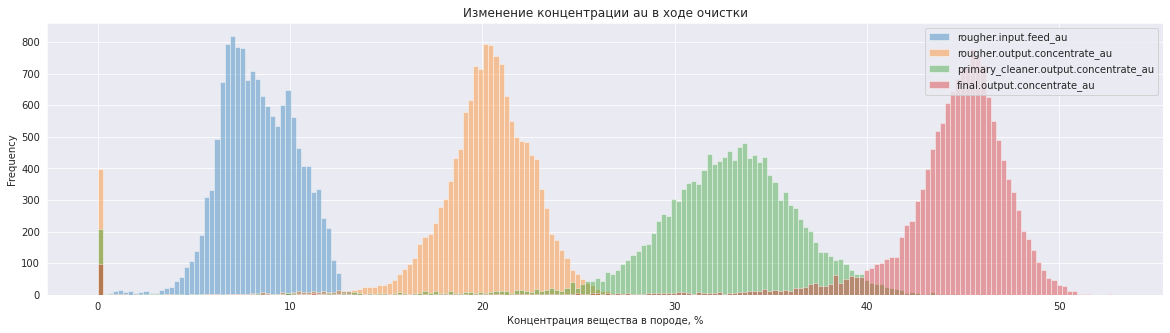

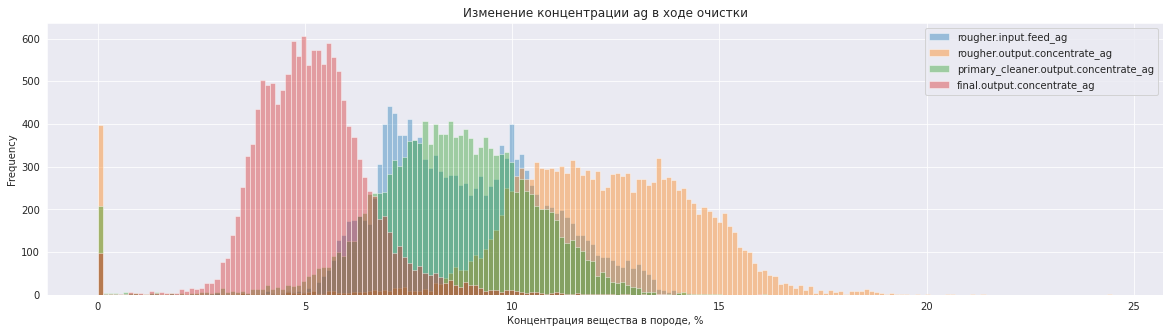

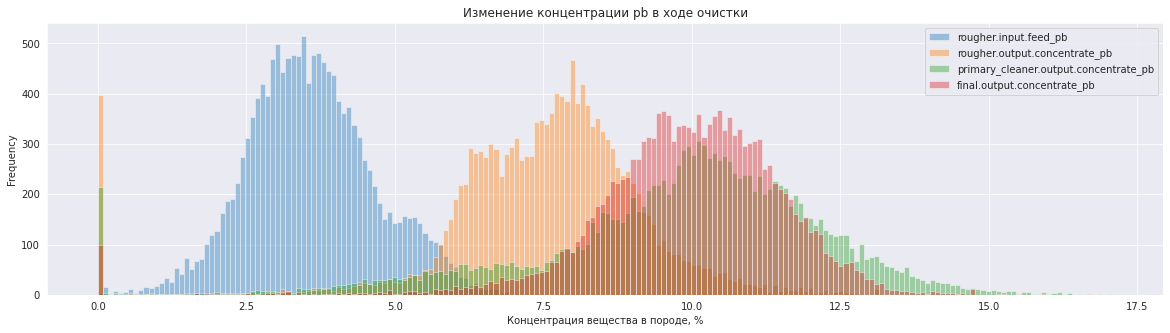

In [14]:
svod_data = {}
for metal in METALS:
    current_factors = [factor + '_' + metal for factor in FACTORS_FOR_ANALYSIS]
    
    svod_data[metal] = {x: y for x, y in zip(FACTORS_FOR_ANALYSIS, train[current_factors].mean().values)}
    
    train[current_factors].plot(kind='hist',
                                figsize=(20, 5),
                                bins=200,
                                alpha=0.4)
    plt.legend(loc='upper right')
    plt.title(f'Изменение концентрации {metal} в ходе очистки')
    plt.xlabel('Концентрация вещества в породе, %')
    plt.show()

На данных гистограммах наглядно показано на каких этапах обработки опредленные металлы имеют свои наибольшие концентрации, однако посомтрим средние значения в виде таблицы, чтобы конкретнее определить значения изменений

In [15]:
display(pd.DataFrame(svod_data).T)

,rougher.input.feed,rougher.output.concentrate,primary_cleaner.output.concentrate,final.output.concentrate
au,8.352941,19.717470,32.007535,43.979499
ag,8.877460,11.944253,8.468626,5.192032
pb,3.592094,7.498953,9.731606,9.923715


* Концентрация золота (au) растет в ходе всего технологического процесса. Она вырастает с 8.35% до 44%
* Концентрация серебра (ag) вырастает после первого этапа очистки на 3% (до 11.9%), однако затем снижается ниже первоначального состояния (5.2%)
* Концентрация свинца незначительно растет в ходе всего процесса очистки с 3.6% до 9.9%

### Сравнение распределения размеров гранул исходного сырья на обучающей и тестовой выборках

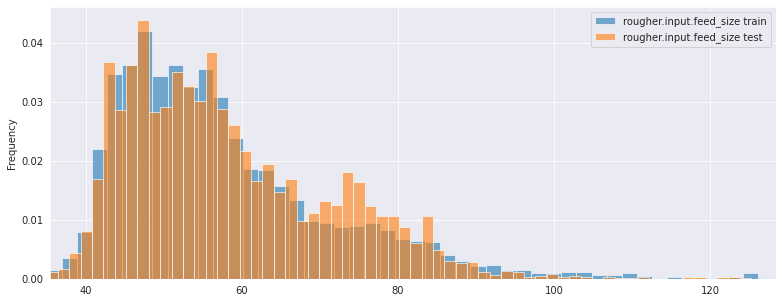

In [16]:
for data in (train, test):
    data['rougher.input.feed_size'].plot(kind='hist',
                                        bins=250,
                                        figsize=(13, 5),
                                        alpha=0.6,
                                        density=True)
    
    xlimit_min = train['rougher.input.feed_size'].quantile(0.01)
    xlimit_max = train['rougher.input.feed_size'].quantile(0.99)
    plt.legend(['rougher.input.feed_size train', 'rougher.input.feed_size test'])
    plt.xlim(xlimit_min, xlimit_max)

Распределения на обучающей и тестовой выборках выглядят довольно похоже, соответсвенно оценка модели должна быть корректной

### Исследование суммарной концентрации металлов на разных стадиях: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате

In [17]:
# добавим сульфаты
METALS.append('sol')

# рассчитаем сумманые конценрации на разных стадиях по дате
for factor in FACTORS_FOR_ANALYSIS:
    train[factor+'_total'] = train[[factor + '_' + metal for metal in METALS]].sum(axis=1)

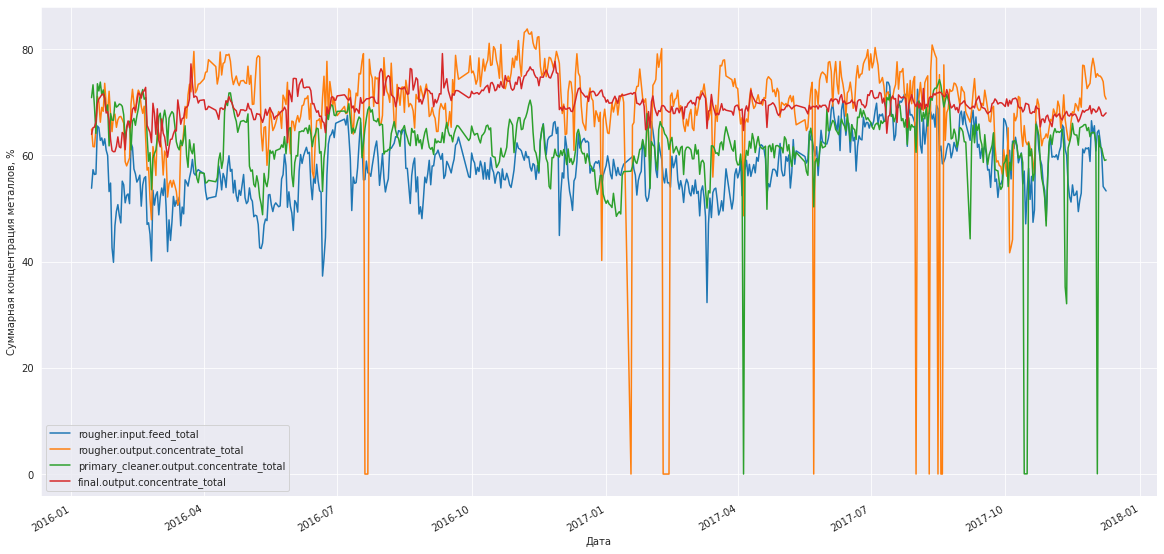

In [18]:
data_for_visualization = train[[factor+'_total' for factor in FACTORS_FOR_ANALYSIS]]

data_for_visualization.groupby(data_for_visualization.index.floor('D')).median().plot(figsize=(20, 10))

plt.xlabel('Дата')
plt.ylabel('Суммарная концентрация металлов, %')
plt.legend(loc='lower left')
plt.show()

На графике наблюдаем, что на стадии после флотации и на финальном этапе наибольшая концентрация металлов. Оценим выбросы, которые встречаются на графике:

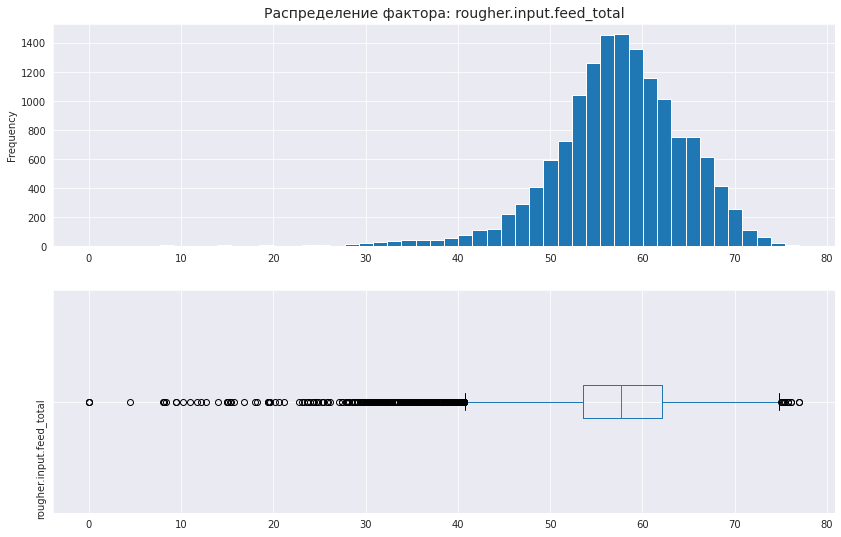

count    14579.000000
mean        57.368141
std          7.337656
min          0.040000
25%         53.571208
50%         57.693000
75%         62.122859
max         76.978947
Name: rougher.input.feed_total, dtype: float64

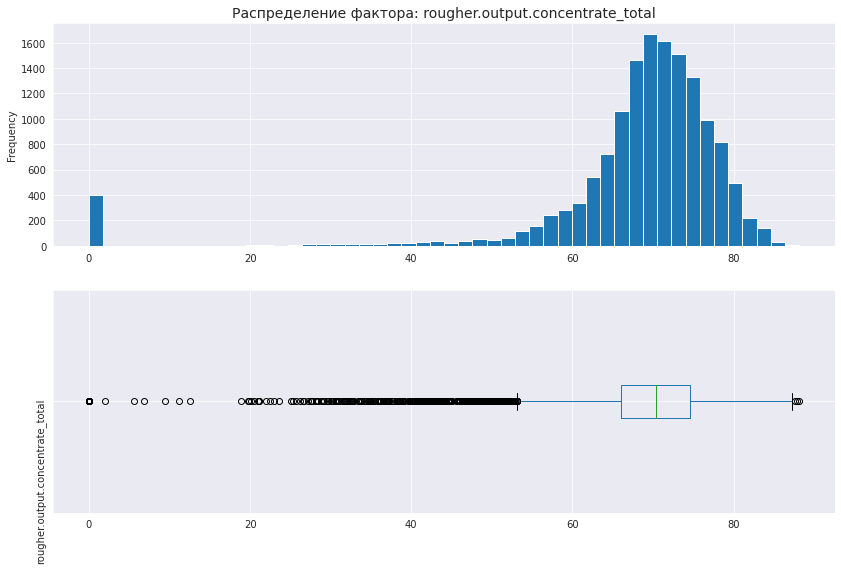

count    14579.000000
mean        67.804972
std         13.739990
min          0.000000
25%         65.991033
50%         70.350734
75%         74.548465
max         88.140119
Name: rougher.output.concentrate_total, dtype: float64

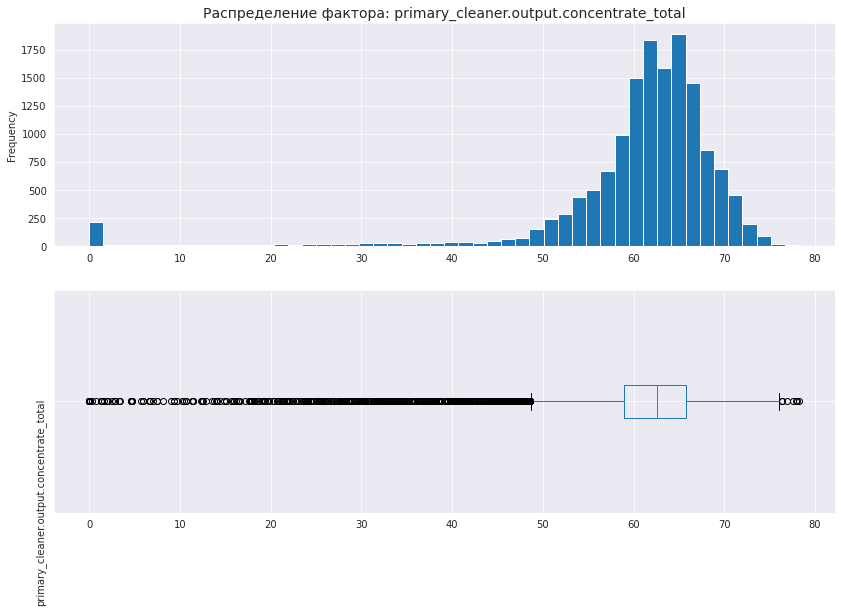

count    14579.000000
mean        60.684505
std         10.565578
min          0.000000
25%         58.951881
50%         62.541132
75%         65.825712
max         78.255313
Name: primary_cleaner.output.concentrate_total, dtype: float64

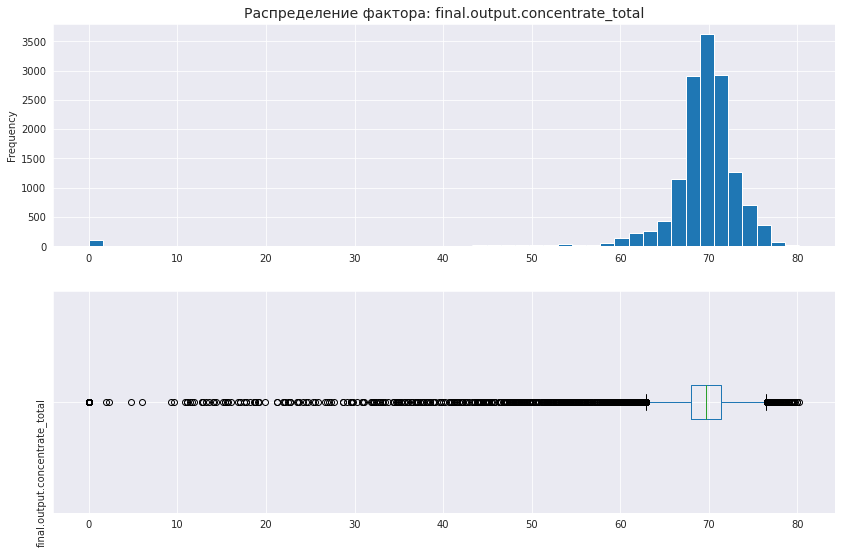

count    14579.000000
mean        68.572035
std          8.012399
min          0.000000
25%         68.014187
50%         69.664788
75%         71.419521
max         80.210644
Name: final.output.concentrate_total, dtype: float64

In [19]:
for factor in [factor+'_total' for factor in FACTORS_FOR_ANALYSIS]:
    
    fig, axes = plt.subplots(2, 1, figsize=(14, 9))
    
    # построим боксплоты
    train[factor].plot(kind='box', vert=False, ax=axes[1], rot=90)
    
    # построим гистограммы
    train[factor].plot(kind='hist', ax=axes[0], bins=50)
    
    axes[0].set_title(f'Распределение фактора: {factor}', fontsize=14)
    plt.show()
    
    display(train[factor].describe())

In [20]:
# удалим выбросы

print('Размер датасета до удаления выбросов:', train.shape)

# старый код
# for factor in [factor+'_total' for factor in FACTORS_FOR_ANALYSIS]:
#     q1, q3 = train[factor].quantile([0.25, 0.75])
#     iqr = q3 - q1
    
#     min_norm_val = q1 - 1.5 * iqr
#     max_norm_val = q3 + 1.5 * iqr
    
#     train = train[(train[factor]>=min_norm_val)&(train[factor]<=max_norm_val)]

# удалим выбросы (где суммарные значения металлов равны 0)
train = train[~((train['rougher.input.feed_total']==0)|
         (train['rougher.output.concentrate_total']==0)|
         (train['primary_cleaner.output.concentrate_total']==0)|
         (train['final.output.concentrate_total']==0))]


print('Размер датасета после удаления выбросов:', train.shape)

Размер датасета до удаления выбросов: (14579, 90)
Размер датасета после удаления выбросов: (13988, 90)


## Модель

### Функция для вычисления sMAPE

In [21]:
def calc_smape(target_actual, target_predictions):
    numerator = np.abs(target_actual - target_predictions)
    denominator = (np.abs(target_actual) + np.abs(target_predictions)) / 2 

    smape_score = np.sum(numerator / denominator) / len(target_actual) * 100
    
    return smape_score
    

def calc_final_smape_short(smape_rougher, smape_final):
    final_smape_score = 0.25 * smape_rougher + 0.75 * smape_final
    return final_smape_score
    
    
def calc_final_smape(target_actual, target_predictions):
    # Получаем фактические значения целевых переменных для каждого этапа
    target_actual_rougher = target_actual['rougher.output.recovery']
    target_actual_final = target_actual['final.output.recovery']
    
    # Получаем предсказанные значения целевых переменных для каждого этапа
    target_predictions_rougher = target_predictions.iloc[:, 0]
    target_predictions_final = target_predictions.iloc[:, 1]
    
    # Вычисляем SMAPE для каждого этапа и умножаем на соответствующий коэффициент
    smape_rougher = calc_smape(target_actual_rougher, target_predictions_rougher)
    smape_final = calc_smape(target_actual_final, target_predictions_final)
    
    final_smape_score = 0.25 * smape_rougher + 0.75 * smape_final
    
    return final_smape_score

In [22]:
smape_score = make_scorer(calc_smape)

### Построение моделей

Оставим в обучающем датасете те же признаки, что и в тестовом, чтобы при валидации не возникало конфликтов

In [23]:
train = train[test.columns]

# выделим признаки и целевые параметры
features_train = train.drop(columns=TARGETS)
target_train_r = train[TARGETS[0]]
target_train_f = train[TARGETS[1]]

features_test = test.drop(columns=TARGETS)
target_test_r = test[TARGETS[0]]
target_test_f = test[TARGETS[1]]

#### Предсказание медианным значением

In [24]:
median_data_test = pd.DataFrame(index=test.index)
median_data_test['rougher.output.recovery'] = test['rougher.output.recovery'].median()
median_data_test['final.output.recovery'] = test['final.output.recovery'].median()

median_data_train = pd.DataFrame(index=train.index)
median_data_train['rougher.output.recovery'] = train['rougher.output.recovery'].median()
median_data_train['final.output.recovery'] = train['final.output.recovery'].median()

In [25]:
print('sMAPE на тестовой выборке:', calc_final_smape(test, median_data_test))
print('sMAPE на обучающей выборке:', calc_final_smape(train, median_data_train))

sMAPE на тестовой выборке: 8.258034484382982
sMAPE на обучающей выборке: 9.011724876664688


Предсказывая медианным значением имеем метрику sMAPE 8.25% на тестовой выборке и 9.01% на обучающей выборке. Будем учитывать это в дальнейшем

#### Линейная регрессия

In [26]:
# масштабируем данные для линейны моделей
scaler = StandardScaler()
scaler.fit(features_train)
features_train = scaler.transform(features_train)

# масштабируем и тестовую выборку
features_test = scaler.transform(features_test)

In [27]:
# инициализируем модель
lin_model_r = LinearRegression()
lin_model_f = LinearRegression()

# Обучим модель для этапа флотации
smape_lm_r = cross_val_score(lin_model_r, features_train, target_train_r, 
                             scoring = smape_score,
                             cv = 5).mean()

# Обучим модель для финального этапа
smape_lm_f = cross_val_score(lin_model_f, features_train, target_train_f, 
                             scoring = smape_score,
                             cv = 5).mean()

In [28]:
calc_final_smape_short(smape_lm_r, smape_lm_f)

8.868239156986025

Модель линейной регрессии без подбора гиперпараметров показало sMAPE равную 8.86%, что немного лучше, чем предсказание медианным значением

#### Lasso-регрессия

In [29]:
lasso_r = Lasso()
lasso_f = Lasso()

# Обучим модель для этапа флотации
smape_lasso_r = cross_val_score(lasso_r, features_train, target_train_r, 
                             scoring = smape_score,
                             cv = 5).mean()

# Обучим модель для финального этапа
smape_lasso_f = cross_val_score(lasso_f, features_train, target_train_f, 
                             scoring = smape_score,
                             cv = 5).mean()

In [30]:
calc_final_smape_short(smape_lasso_r, smape_lasso_f)

8.146959667642625

Lasso-регрессия показала результаты лучше, чем обычная моедль линейной регрессии ввиду своей регуляризации

#### Модель случайного леса

In [31]:
# regr_r = RandomForestRegressor(max_depth=2, random_state=RANDOM_SEED)
# regr_f = RandomForestRegressor(max_depth=2, random_state=RANDOM_SEED)

# # Обучим модель для этапа флотации
# smape_regr_r = cross_val_score(regr_r, features_train, target_train_r, 
#                              scoring = smape_score,
#                              cv = 5).mean()

# # Обучим модель для финального этапа
# smape_regr_f = cross_val_score(regr_f, features_train, target_train_f, 
#                              scoring = smape_score,
#                              cv = 5).mean()

In [32]:
# calc_final_smape_short(smape_regr_r, smape_regr_f)
#8.397928059448029

Модель случайного леса показывает метрику sMAPE 8.39, что немного хуже, чем модель Lasso

### Проверка на тестовой выборке

In [33]:
lasso_r = Lasso()
lasso_f = Lasso()

lasso_r.fit(features_train, target_train_r)
lasso_f.fit(features_train, target_train_f)

pred_test_r = lasso_r.predict(features_test)
pred_test_f = lasso_f.predict(features_test)

smape_test_r = calc_smape(pred_test_r, target_test_r)
smape_test_f = calc_smape(pred_test_f, target_test_f)

calc_final_smape_short(smape_test_r, smape_test_f)

7.4487200348960485

В данном разделе были построены модели линейных регрессий, модель случайного леса, а также константная модель

Лучшей оказалась модель линейной регрессии (Lasso). Она показала на тестовой выборке значение sMAPE 7.45%

## Выводы

1) В процессе анализа данных было проверено, что показатель эффективности обогащения рассчитан корректно. Также была проведена предобработка данных, на основе которых был проведен анализ и построены модели.

2) Были проанализированы концентрации металлов (Au, Ag, Pb), а также суммарные концентрации веществ на всех стадиях очистки. Была выполнена проверка распределения размеров гранул исходного сырья на обучающей и тестовой выборках - выборки оказались похожие.

3) В разделе построения моделей были построены модели линейных регрессий, модель случайного леса, а также константная модель. Лучшей на тестовой выборке оказалась модель линейной регрессии Lasso.